# 8.2.4 GloVe
## Introduction to GloVe (Global Vectors for Word Representation)

**GloVe** (Global Vectors for Word Representation) is an unsupervised learning algorithm used to obtain vector representations for words. Unlike models like Word2Vec, which are based on local context (i.e., predicting surrounding words), GloVe constructs word vectors by analyzing word co-occurrence statistics from a global corpus. 

The GloVe algorithm creates a matrix where each entry represents the co-occurrence of two words within a given context window. By factorizing this matrix, GloVe produces word vectors that capture semantic meaning and relationships between words based on their co-occurrence patterns in the corpus.

**Benefits of GloVe:**
- **Captures Global Statistics:** GloVe leverages the entire corpus, capturing global word co-occurrence statistics, which helps in understanding word semantics more deeply.
- **Effective Word Representation:** The word vectors generated by GloVe can capture various semantic and syntactic word relationships, making them useful for many NLP tasks.
- **Scalability:** GloVe is designed to handle large corpora efficiently, making it suitable for creating embeddings from extensive text datasets.

**Use Cases:**
- **Text Classification:** Embeddings from GloVe can be used as features for text classification tasks.
- **Named Entity Recognition (NER):** Word vectors help in identifying and classifying named entities in text.
- **Semantic Similarity:** GloVe vectors can be used to compute similarity between words or phrases.


___
___
### Readings:
- [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)
- [Intuitive Guide to Understanding GloVe Embeddings](https://readmedium.com/en/https:/towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)
- [NLP — Word Embedding & GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)
___
___

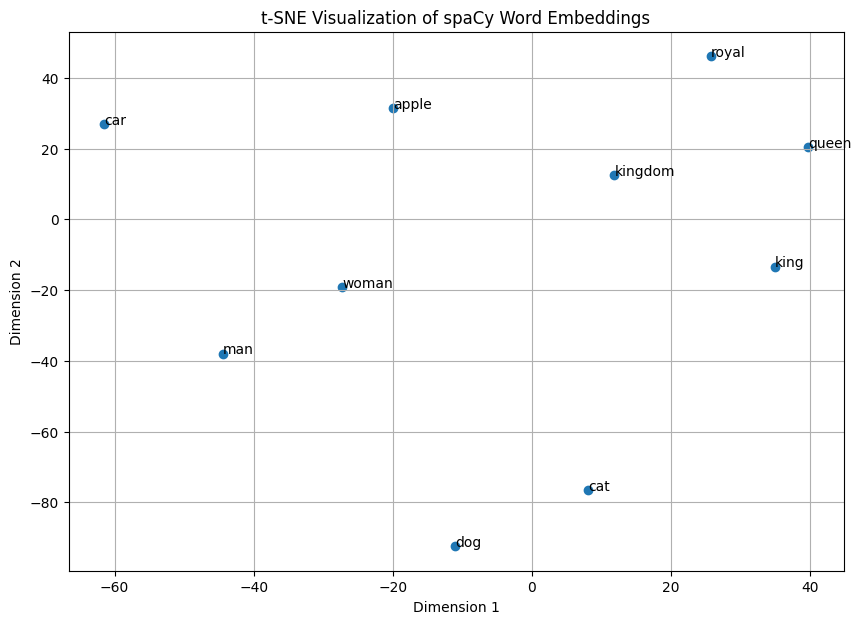

In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load spaCy's pre-trained medium-sized model with word vectors
nlp = spacy.load('en_core_web_md')

# Define words to visualize
words = ['king', 'queen', 'man', 'woman', 'apple', 'car', 'dog', 'cat', 'kingdom', 'royal']

# Retrieve vectors for the words
word_vectors = []
valid_words = []

for word in words:
    # Process the word with spaCy
    token = nlp(word)
    
    # Check if the token has a vector
    if token.has_vector:
        word_vectors.append(token.vector)
        valid_words.append(word)

word_vectors = np.array(word_vectors)

# Check if we have valid vectors
if len(valid_words) < 2:
    raise ValueError("Not enough valid word vectors found. Please check the words and ensure they are in the model's vocabulary.")

# Ensure perplexity is less than the number of samples
perplexity_value = min(5, len(valid_words) - 1)

# t-SNE for dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(10, 7))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(valid_words):
    plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))

plt.title('t-SNE Visualization of spaCy Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


# Conclusion

GloVe provides a powerful method for generating word vectors by leveraging global word co-occurrence statistics. It excels in capturing the broader semantic meaning of words and their relationships within a corpus. By using pre-trained GloVe vectors or training your own, you can enhance various NLP tasks such as text classification, named entity recognition, and semantic similarity analysis. The GloVe model is particularly valuable for creating high-quality word embeddings from large-scale text corpora.
